In [2]:
%pylab inline
import time
import os 
image_dir = os.getcwd() + '/Images/'

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

import torchvision
from torchvision import transforms

from PIL import Image
from collections import OrderedDict

Populating the interactive namespace from numpy and matplotlib


In [3]:
# pre and post processing for images
img_size = 512 
prep = transforms.Compose([transforms.Scale(img_size),
                           transforms.CenterCrop(512),
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x[torch.LongTensor([2,1,0])]), #turn to BGR
                           transforms.Normalize(mean=[0.40760392, 0.45795686, 0.48501961], #subtract imagenet mean
                                                std=[1,1,1]),
                           transforms.Lambda(lambda x: x.mul_(255)),
                          ])
postpa = transforms.Compose([transforms.Lambda(lambda x: x.mul_(1./255)),
                           transforms.Normalize(mean=[-0.40760392, -0.45795686, -0.48501961], #add imagenet mean
                                                std=[1,1,1]),
                           transforms.Lambda(lambda x: x[torch.LongTensor([2,1,0])]), #turn to RGB
                           ])
postpb = transforms.Compose([transforms.ToPILImage()])
def postp(tensor): # to clip results in the range [0,1]
    t = postpa(tensor)
    t[t>1] = 1    
    t[t<0] = 0
    img = postpb(t)
    return img

In [4]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, 3, 1, 1)
        self.conv2 = nn.Conv2d(4, 6, 3, 1, 1)        
        self.conv3 = nn.Conv2d(6, 8, 1)

    def forward(self, x):
        out = {}        
        upSample = nn.Upsample(scale_factor=2, mode='nearest')
        out['y11'] = (F.relu(self.conv1(x)))
        #print(out['y11'].size())
        out['y12'] = (F.relu(self.conv2(out['y11'])))
        #print(out['y12'].size())        
        out['y13'] = upSample(F.relu(self.conv3(out['y12'])))
        #print(out['y13'].size())
        return out['y13']


net11 = Net()
net12 = Net()
net13 = Net()

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(8, 12, 3, 1, 1)
        self.conv2 = nn.Conv2d(12, 16, 3, 1, 1)        
        self.conv3 = nn.Conv2d(16, 24, 1)

    def forward(self, x):
        out = {}        
        upSample = nn.Upsample(scale_factor=2, mode='nearest')
        out['y11'] = (F.relu(self.conv1(x)))
        #print(out['y11'].size())
        out['y12'] = (F.relu(self.conv2(out['y11'])))
        #print(out['y12'].size())        
        out['y13'] = upSample(F.relu(self.conv3(out['y12'])))
        #print(out['y13'].size())
        return out['y13']


net2 = Net2()


class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.conv1 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv2 = nn.Conv2d(32, 32, 3, 1, 1)        
        self.conv3 = nn.Conv2d(32, 32, 1)

    def forward(self, x):
        out = {}        
        upSample = nn.Upsample(scale_factor=2, mode='nearest')
        out['y11'] = (F.relu(self.conv1(x)))
        #print(out['y11'].size())
        out['y12'] = (F.relu(self.conv2(out['y11'])))
        #print(out['y12'].size())        
        out['y13'] = upSample(F.relu(self.conv3(out['y12'])))
        #print(out['y13'].size())
        return out['y13']


net3 = Net3()



class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.conv1 = nn.Conv2d(40, 40, 3, 1, 1)
        self.conv2 = nn.Conv2d(40, 40, 3, 1, 1)        
        self.conv3 = nn.Conv2d(40, 40, 1)
        self.conv4 = nn.Conv2d(40, 3, 1)

    def forward(self, x):
        out = {}        
        upSample = nn.Upsample(scale_factor=2, mode='nearest')
        out['y11'] = (F.relu(self.conv1(x)))
        #print(out['y11'].size())
        out['y12'] = (F.relu(self.conv2(out['y11'])))
        #print(out['y12'].size())        
        out['y13'] = (F.relu(self.conv3(out['y12'])))
        #print(out['y13'].size())
        out['y14'] = (F.relu(self.conv4(out['y13'])))
        print(out['y14'].size())
        return out['y14']


net4 = Net4()

In [5]:
#load images, ordered as [style_image, content_image]
img_dirs = [image_dir, image_dir]
img_names = ['imgs.jpeg', 'dog.jpeg']
imgs = [Image.open(img_dirs[i] + name) for i,name in enumerate(img_names)]
imgs_torch = [prep(img) for img in imgs]

if torch.cuda.is_available():
    imgs_torch = [Variable(img.unsqueeze(0).cuda()) for img in imgs_torch]
else:
    imgs_torch = [Variable(img.unsqueeze(0)) for img in imgs_torch]
style_image, content_image = imgs_torch

#opt_img = Variable(torch.randn(content_image.size()).type_as(content_image.data), requires_grad=True) #random init
#opt_img = Variable(content_image.data.clone(), requires_grad=True)
print(style_image.size())

torch.Size([1, 3, 512, 512])


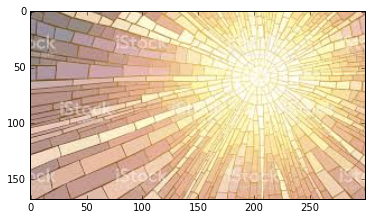

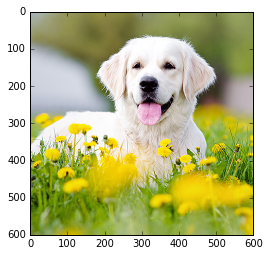

In [6]:
#display images
for img in imgs:
    imshow(img);show()

In [7]:
#x1=list(net1.parameters())+list(net2.parameters())+list(net3.parameters())+list(net4.parameters())
optimizer11 = optim.Adam(net11.parameters(), lr = 0.001)
optimizer12 = optim.Adam(net12.parameters(), lr = 0.001)
optimizer13 = optim.Adam(net13.parameters(), lr = 0.001)
optimizer2 = optim.Adam(net2.parameters(), lr = 0.001)
optimizer3 = optim.Adam(net3.parameters(), lr = 0.001)    
optimizer4 = optim.Adam(net4.parameters(), lr = 0.001)


In [65]:
for i in range(5):
    optimizer11.zero_grad()   # zero the gradient buffers
    optimizer12.zero_grad()  
    optimizer13.zero_grad()  
    optimizer2.zero_grad()
    optimizer3.zero_grad()
    optimizer4.zero_grad()
    z1 = Variable(torch.randn(1, 3, 256, 256));
    z2 = Variable(torch.randn(1, 3, 128, 128));
    z3 = Variable(torch.randn(1, 3, 64, 64));
    out_z1 = net11(z1);
    out_z2 = net12(z2);
    out_z31 = net13(z3);
    out_z32 = net2(out_z31);
    out_z21 = torch.cat([out_z32,out_z2], 1) #Z32 and z2 ([1, 32, 256, 256])
    out_z22 = net3(out_z21);    #o/p = [1, 32, 512, 512]
    out_z3 = torch.cat([out_z1,out_z22],1)#appending here out_z1 + out_z22 ([1, 40, 512, 512])
    out_z4 = net4(out_z3); #op = [1, 3, 512, 512]
    loss = nn.MSELoss();
    out_loss = loss(out_z4, style_image.cpu());
    print(i)
    print(out_loss)
    out_loss.backward()
    optimizer11.step()    # Does the update
    optimizer12.step() 
    optimizer13.step() 
    optimizer2.step()
    optimizer3.step()
    optimizer4.step()

torch.Size([1, 3, 512, 512])
0
Variable containing:
 684.0159
[torch.FloatTensor of size 1]

torch.Size([1, 3, 512, 512])
1
Variable containing:
 683.7481
[torch.FloatTensor of size 1]

torch.Size([1, 3, 512, 512])
2
Variable containing:
 683.3592
[torch.FloatTensor of size 1]

torch.Size([1, 3, 512, 512])
3
Variable containing:
 685.2880
[torch.FloatTensor of size 1]

torch.Size([1, 3, 512, 512])
4
Variable containing:
 686.5376
[torch.FloatTensor of size 1]



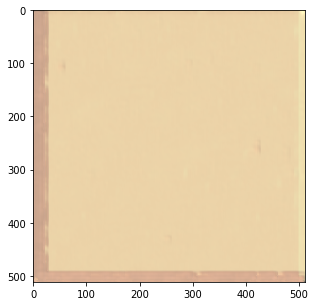

In [66]:
out_img = postp(out_z4.data[0].cpu().squeeze())
imshow(out_img)
gcf().set_size_inches(5, 5)